# Method of Characteristics: C5G7 Benchmark

C5G7 is a well known multi-group benchmark in nuclear reactor physics. It is 1/4th of a 2D mini-core geometry that contains 4 assemblies. Two assemblies have UO2 fuel while the two others have MOX fuel. In this example we will simulate this benchmark using the Method of Characteristics solver in Scarabée. We can start by importing all the necessary libraries:

In [1]:
import scarabee as scrb
import numpy as np
import matplotlib.pyplot as plt

Next, we will define all of the multi-group cross sections for the UO2 fuel, the different MOX fuels, the guide tubes, the fission chambers, and the moderator.

In [2]:
# UO2 Fuel
Et = np.array([1.77949E-01, 3.29805E-01, 4.80388E-01, 5.54367E-01, 3.11801E-01, 3.95168E-01, 5.64406E-01])
Ea = np.array([8.02480E-03, 3.71740E-03, 2.67690E-02, 9.62360E-02, 3.00200E-02, 1.11260E-01, 2.82780E-01])
Ef = np.array([7.21206E-03, 8.19301E-04, 6.45320E-03, 1.85648E-02, 1.78084E-02, 8.30348E-02, 2.16004E-01])
nu = np.array([2.78145, 2.47443, 2.43383, 2.43380, 2.43380, 2.43380, 2.43380])
chi = np.array([5.87910E-01, 4.11760E-01, 3.39060E-04, 1.17610E-07, 0., 0., 0.])
Es = np.array([[1.27537E-01, 4.23780E-02, 9.43740E-06, 5.51630E-09, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 3.24456E-01, 1.63140E-03, 3.14270E-09, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 4.50940E-01, 2.67920E-03, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 4.52565E-01, 5.56640E-03, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 1.25250E-04, 2.71401E-01, 1.02550E-02, 1.00210E-08],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 1.29680E-03, 2.65802E-01, 1.68090E-02],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 8.54580E-03, 2.73080E-01]])
UO2xs = scrb.CrossSection(Et, Ea, Es, Ef, nu*Ef, chi, name="UO2")

# 4.3% MOX Fuel
Et = np.array([1.78731E-01, 3.30849E-01, 4.83772E-01, 5.66922E-01, 4.26227E-01, 6.78997E-01, 6.82852E-01])
Ea = np.array([8.43390E-03, 3.75770E-03, 2.79700E-02, 1.04210E-01, 1.39940E-01, 4.09180E-01, 4.09350E-01])
Ef = np.array([7.62704E-03, 8.76898E-04, 5.69835E-03, 2.28872E-02, 1.07635E-02, 2.32757E-01, 2.48968E-01])
nu = np.array([2.85209,     2.89099,     2.85486,     2.86073,     2.85447,     2.86415,     2.86780])
chi = np.array([5.87910E-01, 4.11760E-01, 3.39060E-04, 1.17610E-07, 0.,          0.,          0.])
Es = np.array([[1.28876E-01, 4.14130E-02, 8.22900E-06, 5.04050E-09, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 3.25452E-01, 1.63950E-03, 1.59820E-09, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 4.53188E-01, 2.61420E-03, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 4.57173E-01, 5.53940E-03, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 1.60460E-04, 2.76814E-01, 9.31270E-03, 9.16560E-09],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 2.00510E-03, 2.52962E-01, 1.48500E-02],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 8.49480E-03, 2.65007E-01]])
M4xs = scrb.CrossSection(Et, Ea, Es, Ef, nu*Ef, chi, name="4.3% MOX")

# 7.0% MOX Fuel
Et = np.array([1.81323E-01, 3.34368E-01, 4.93785E-01, 5.91216E-01, 4.74198E-01, 8.33601E-01, 8.53603E-01])
Ea = np.array([9.06570E-03, 4.29670E-03, 3.28810E-02, 1.22030E-01, 1.82980E-01, 5.68460E-01, 5.85210E-01])
Ef = np.array([8.25446E-03, 1.32565E-03, 8.42156E-03, 3.28730E-02, 1.59636E-02, 3.23794E-01, 3.62803E-01])
nu = np.array([2.88498,     2.91079,     2.86574,     2.87063,     2.86714,     2.86658,     2.87539])
chi = np.array([5.87910E-01, 4.11760E-01, 3.39060E-04, 1.17610E-07, 0.,          0.,          0.])
Es = np.array([[1.30457E-01, 4.17920E-02, 8.51050E-06, 5.13290E-09, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 3.28428E-01, 1.64360E-03, 2.20170E-09, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 4.58371E-01, 2.53310E-03, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 4.63709E-01, 5.47660E-03, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 1.76190E-04, 2.82313E-01, 8.72890E-03, 9.00160E-09],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 2.27600E-03, 2.49751E-01, 1.31140E-02],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 8.86450E-03, 2.59529E-01]])
M7xs = scrb.CrossSection(Et, Ea, Es, Ef, nu*Ef, chi, name="7.0% MOX")

# 8.7% MOX Fuel
Et = np.array([1.83045E-01, 3.36705E-01, 5.00507E-01, 6.06174E-01, 5.02754E-01, 9.21028E-01, 9.55231E-01])
Ea = np.array([9.48620E-03, 4.65560E-03, 3.62400E-02, 1.32720E-01, 2.08400E-01, 6.58700E-01, 6.90170E-01])
Ef = np.array([8.67209E-03, 1.62426E-03, 1.02716E-02, 3.90447E-02, 1.92576E-02, 3.74888E-01, 4.30599E-01])
nu = np.array([2.90426,     2.91795,     2.86986,     2.87491,     2.87175,     2.86752,     2.87808])
chi = np.array([5.87910E-01, 4.11760E-01, 3.39060E-04, 1.17610E-07, 0.,          0.,          0.])
Es = np.array([[1.31504E-01, 4.20460E-02, 8.69720E-06, 5.19380E-09, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 3.30403E-01, 1.64630E-03, 2.60060E-09, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 4.61792E-01, 2.47490E-03, 0.00000E+00, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 4.68021E-01, 5.43300E-03, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 1.85970E-04, 2.85771E-01, 8.39730E-03, 8.92800E-09],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 2.39160E-03, 2.47614E-01, 1.23220E-02],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 8.96810E-03, 2.56093E-01]])
M8xs = scrb.CrossSection(Et, Ea, Es, Ef, nu*Ef, chi, name="8.7 % MOX")

# Water Moderator
Et = np.array([1.59206E-01, 4.12970E-01, 5.90310E-01, 5.84350E-01, 7.18000E-01, 1.25445E+00, 2.65038E+00])
Ea = np.array([6.01050E-04, 1.57930E-05, 3.37160E-04, 1.94060E-03, 5.74160E-03, 1.50010E-02, 3.72390E-02])
Es = np.array([[4.44777E-02, 1.13400E-01, 7.23470E-04, 3.74990E-06, 5.31840E-08, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 2.82334E-01, 1.29940E-01, 6.23400E-04, 4.80020E-05, 7.44860E-06, 1.04550E-06],
               [0.00000E+00, 0.00000E+00, 3.45256E-01, 2.24570E-01, 1.69990E-02, 2.64430E-03, 5.03440E-04],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 9.10284E-02, 4.15510E-01, 6.37320E-02, 1.21390E-02],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 7.14370E-05, 1.39138E-01, 5.11820E-01, 6.12290E-02],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 2.21570E-03, 6.99913E-01, 5.37320E-01],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 1.32440E-01, 2.48070E+00]])
H2Oxs = scrb.CrossSection(Et, Ea, Es, name="Water")

# Fission Chamber
Et = np.array([1.26032E-01, 2.93160E-01, 2.84250E-01, 2.81020E-01, 3.34460E-01, 5.65640E-01, 1.17214E+00])
Ea = np.array([5.11320E-04, 7.58130E-05, 3.16430E-04, 1.16750E-03, 3.39770E-03, 9.18860E-03, 2.32440E-02])
Ef = np.array([4.79002E-09, 5.82564E-09, 4.63719E-07, 5.24406E-06, 1.45390E-07, 7.14972E-07, 2.08041E-06])
nu = np.array([2.76283,     2.46239,     2.43380,     2.43380,     2.43380,     2.43380,     2.43380])
chi = np.array([5.87910E-01, 4.11760E-01, 3.39060E-04, 1.17610E-07, 0.,          0.,          0.])
Es = np.array([[6.61659E-02, 5.90700E-02, 2.83340E-04, 1.46220E-06, 2.06420E-08, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 2.40377E-01, 5.24350E-02, 2.49900E-04, 1.92390E-05, 2.98750E-06, 4.21400E-07],
               [0.00000E+00, 0.00000E+00, 1.83425E-01, 9.22880E-02, 6.93650E-03, 1.07900E-03, 2.05430E-04],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 7.90769E-02, 1.69990E-01, 2.58600E-02, 4.92560E-03],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 3.73400E-05, 9.97570E-02, 2.06790E-01, 2.44780E-02],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 9.17420E-04, 3.16774E-01, 2.38760E-01],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 4.97930E-02, 1.09910E+00]])
FCxs = scrb.CrossSection(Et, Ea, Es, Ef, nu*Ef, chi, name="Fisson Chamber")

# Guide Tube
Et = np.array([1.26032E-01, 2.93160E-01, 2.84240E-01, 2.80960E-01, 3.34440E-01, 5.65640E-01, 1.17215E+00])
Ea = np.array([5.11320E-04, 7.58010E-05, 3.15720E-04, 1.15820E-03, 3.39750E-03, 9.18780E-03, 2.32420E-02])
Es = np.array([[6.61659E-02, 5.90700E-02, 2.83340E-04, 1.46220E-06, 2.06420E-08, 0.00000E+00, 0.00000E+00],
               [0.00000E+00, 2.40377E-01, 5.24350E-02, 2.49900E-04, 1.92390E-05, 2.98750E-06, 4.21400E-07],
               [0.00000E+00, 0.00000E+00, 1.83297E-01, 9.23970E-02, 6.94460E-03, 1.08030E-03, 2.05670E-04],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 7.88511E-02, 1.70140E-01, 2.58810E-02, 4.92970E-03],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 3.73330E-05, 9.97372E-02, 2.06790E-01, 2.44780E-02],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 9.17260E-04, 3.16765E-01, 2.38770E-01],
               [0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 0.00000E+00, 4.97920E-02, 1.09912E+00]])
GTxs = scrb.CrossSection(Et, Ea, Es, name="Guide Tube")

The provided names to each `CrossSection` are not required, but that are useful when plotting the problem geometry later on, as we will be able to see the name of the material at a given location. This can be useful when debugging problem inputs.

With material properties defined, we can now work on the geometry. We will start by constructing the different types of pin cells required for the simulation. For this, we will use the `PinCell` class, which takes a list of radii and cross section objects as arguments, in addition to the pitch. The `PinCell` class will automatically break the cell into 8 octants, but it is up to the user to define the desired radial divisions. In the C5G7 benchmark, fuel pins are homogenous with a radius of 0.54 cm, and pin cells have a pitch of 1.26 cm. To get better results in the simulation, we will break each fuel pin into two annular regions of equal area:

$$
    \frac{A}{2} = \pi (R_{f}^2 - R_{in}^2)
$$

$$
    R_{in} = \sqrt{R_f^2 - \frac{A}{2\pi}} = \sqrt{R_f^2 - \frac{R_f^2}{2}} = \frac{R_f}{\sqrt{2}} = \frac{0.54\text{ cm}}{\sqrt{2}} \approx 0.382\text{ cm}.
$$

Additionally, we will add a ring of moderator around each fuel pin which extends to the outer surface of a pin cell, and therefore has a radius of half the pitch, 0.63 cm. Each list of materials has one more `CrossSection` than there are radii. This is to be used as the material outside the outer most radius and inside the pin cell boundary.

In [3]:
# Constants for geometry
pitch = 1.26
Rin = 0.382
Rf  = 0.54

# UO2 Pin Cell
radii = [Rin,   Rf,    0.5*pitch]
mats =  [UO2xs, UO2xs, H2Oxs,     H2Oxs]
U2 = scrb.PinCell(radii, mats, pitch, pitch)

# 4.3% MOX Pin Cell
mats =  [M4xs, M4xs, H2Oxs, H2Oxs]
M4 = scrb.PinCell(radii, mats, pitch, pitch)

# 7.0% MOX Pin Cell
mats =  [M7xs, M7xs, H2Oxs, H2Oxs]
M7 = scrb.PinCell(radii, mats, pitch, pitch)

# 8.7% MOX Pin Cell
mats =  [M8xs, M8xs, H2Oxs, H2Oxs]
M8 = scrb.PinCell(radii, mats, pitch, pitch)

# Fission Chamber Pin Cell
mats =  [FCxs, FCxs, H2Oxs, H2Oxs]
FC = scrb.PinCell(radii, mats, pitch, pitch)

# Guide Tube Pin Cell
mats =  [GTxs, GTxs, H2Oxs, H2Oxs]
GT = scrb.PinCell(radii, mats, pitch, pitch)


The next step is to define the UO2 assembly and the MOX assembly. Each one is 17x17, and can be created with a `Cartesian2D` lattice object. The *tiles* of the lattice can in this case be our `PinCell` objects (though in general, it could also be a nested lattice).

In [4]:
dx = [pitch]*17
dy = dx
UO2 = scrb.Cartesian2D(dx, dy)
UO2.set_tiles([U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,
               U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,
               U2,U2,U2,U2,U2,GT,U2,U2,GT,U2,U2,GT,U2,U2,U2,U2,U2,
               U2,U2,U2,GT,U2,U2,U2,U2,U2,U2,U2,U2,U2,GT,U2,U2,U2,
               U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,
               U2,U2,GT,U2,U2,GT,U2,U2,GT,U2,U2,GT,U2,U2,GT,U2,U2,
               U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,
               U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,
               U2,U2,GT,U2,U2,GT,U2,U2,FC,U2,U2,GT,U2,U2,GT,U2,U2,
               U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,
               U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,
               U2,U2,GT,U2,U2,GT,U2,U2,GT,U2,U2,GT,U2,U2,GT,U2,U2,
               U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,
               U2,U2,U2,GT,U2,U2,U2,U2,U2,U2,U2,U2,U2,GT,U2,U2,U2,
               U2,U2,U2,U2,U2,GT,U2,U2,GT,U2,U2,GT,U2,U2,U2,U2,U2,
               U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,
               U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2,U2])

MOX = scrb.Cartesian2D(dx, dy)
MOX.set_tiles([M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,
               M4,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M4,
               M4,M7,M7,M7,M7,GT,M7,M7,GT,M7,M7,GT,M7,M7,M7,M7,M4,
               M4,M7,M7,GT,M7,M8,M8,M8,M8,M8,M8,M8,M7,GT,M7,M7,M4,
               M4,M7,M7,M7,M8,M8,M8,M8,M8,M8,M8,M8,M8,M7,M7,M7,M4,
               M4,M7,GT,M8,M8,GT,M8,M8,GT,M8,M8,GT,M8,M8,GT,M7,M4,
               M4,M7,M7,M8,M8,M8,M8,M8,M8,M8,M8,M8,M8,M8,M7,M7,M4,
               M4,M7,M7,M8,M8,M8,M8,M8,M8,M8,M8,M8,M8,M8,M7,M7,M4,
               M4,M7,GT,M8,M8,GT,M8,M8,FC,M8,M8,GT,M8,M8,GT,M7,M4,
               M4,M7,M7,M8,M8,M8,M8,M8,M8,M8,M8,M8,M8,M8,M7,M7,M4,
               M4,M7,M7,M8,M8,M8,M8,M8,M8,M8,M8,M8,M8,M8,M7,M7,M4,
               M4,M7,GT,M8,M8,GT,M8,M8,GT,M8,M8,GT,M8,M8,GT,M7,M4,
               M4,M7,M7,M7,M8,M8,M8,M8,M8,M8,M8,M8,M8,M7,M7,M7,M4,
               M4,M7,M7,GT,M7,M8,M8,M8,M8,M8,M8,M8,M7,GT,M7,M7,M4,
               M4,M7,M7,M7,M7,GT,M7,M7,GT,M7,M7,GT,M7,M7,M7,M7,M4,
               M4,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M7,M4,
               M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4,M4])

Before defining the core geometry, we need to create empty "water assemblies", which will act as the reflector for the reactor. These will have the same dimensions as the fuel assemblies above. The only other type of cell in Scarabée is an `EmptyCell`, which is a single rectangular shaped flat source region. To ensure that the reflector geometry is adequately refined with flat source regions, we can define a reflector assembly as a nested set of lattices. The first lattice with have a total width and length equal to the pin pitch, and we will use it to divide the area of a single pin cell into uniform regions. Here is an example where each empty pin cell is divided into 4x4 flat source regions:

In [5]:
NW = 4 # Number of empty water cells in a pin cell
dx = [pitch / NW] * NW
WC = scrb.EmptyCell(H2Oxs, pitch / NW, pitch / NW) # Water Cell
WT = scrb.Cartesian2D(dx, dx)                      # Water Tile
WT.set_tiles([WC]*NW*NW)

Next, we create a water assembly, where each tile is one of the previously defined water tiles.

In [6]:
# Water assembly
dx = [pitch]*17
WAS = scrb.Cartesian2D(dx, dx)
WAS.set_tiles([WT]*17*17)

We are now in a position where we can define the entire 2D core geometry, by nesting the previously defined assemblies into another lattice:

In [7]:
# Core assembly
dx = [pitch*17, pitch*17, pitch*17]
core = scrb.Cartesian2D(dx, dx)
core.set_tiles([UO2, MOX, WAS,
                MOX, UO2, WAS,
                WAS, WAS, WAS])

At this point, the geometry has been completely defined. All we need to do is set up the MOC solver, which is done with the `MOCDriver` class. When setting up the boundary conditions for the problem, it is important to remember that if you have added the line breaks in the correct spots in your code, "what you see is what you get". By this, it is meant that the outer corner UO2 assembly will be in the II quadrant of the geometry (touching the +y and -x sides of the problem). For this problem, reflective boundary conditions should be used on the sides where there are fuel assemblies, and vacuum boundary conditions should be used on the sides with water assemblies.

In [8]:
moc = scrb.MOCDriver(core)
moc.x_max_bc = scrb.BoundaryCondition.Vacuum
moc.y_min_bc = scrb.BoundaryCondition.Vacuum

If you would like, you could now bring up the graphical geometry plotter using `moc.plot()`. This would bring up a new windows where you can interactively explore the geometry to ensure it was correctly defined. Here is an example of what the geometry plot looks like for this system:

In [9]:
moc.plot()

![MOC Plotter](../../images/moc_plotter.png)

Before generating the tracks across the problem, we should initialize the CMFD acceleration. CMFD stands for Coarse Mesh Finite-Difference diffusion. This is a technique which solves a diffusion problem using standard cell-centered finite differences. The algorithm is slightly modified, however, to make use of the neutron currents tabulated from the MOC simulation. Since we are able to incorporate the knowledge of the true transport solution, we can make sure that the diffusion and transport solutions are equivalent. This diffusion problem can be solved quite quickly at each MOC iteration, and its results are used to correct the MOC fluxes, leading to much faster convergence.

CMFD is applied over a Cartesian mesh with cells generally on the order of being the size of a pin-cell. The boundaries/division of the CMFD mesh must conform to the boundaries of flat source regions in the MOC geometry. If this is not the case, the simulation might be unstable. While you can perform CMFD in the same group structure as the MOC simulation, you can also perform CMFD with energy condensation, which can often lead to faster CMFD solutions and faster MOC run-times. Let's create a CMFD instance at the pin cell level to accelerate our MOC simulation, using only 3 energy groups instead of the 7 used in the MOC.

In [10]:
moc.cmfd = scrb.CMFD(3*17*[pitch], 3*17*[pitch], [[0,1], [2,4], [5,6]])

Finally, we will set the simulation parameters and run the solver. We have chosen to use 64 azimuthal angles with a track spacing of 0.05 cm. For the polar quadrature, we are using the Yamamoto-Tabuchi 6 point polar quadrature, which will typically always be the best option. The flux and eigenvalue convergence criteria have been set to their default values explicitly, so you can see how you could change them if needed. Typically, however, these default values are very reasonable.

In [11]:
moc.generate_tracks(64, 0.05, scrb.YamamotoTabuchi6())
moc.keff_tolerance = 1.E-5
moc.flux_tolerance = 1.E-5
moc.solve()

[info] Creating quadrature
[info] Number of azimuthal angles: 64
[info] Maximum track spacing: 0.05 cm
[info] Tracing tracks
[info] Renormalizing segment lengths
[info] Determining track connections
[info] Time spent drawing tracks: 9.6152 s.
[info] Solving for keff.
[info] keff tolerance: 1.00000E-05
[info] Flux tolerance: 1.00000E-05
[info] -------------------------------------
[info] Iteration    1          keff: 1.27228
[info]      keff difference:     3.59033E-01
[info]      max flux difference: 2.34399E+00
[info]      iteration time: 8.39932E-01 s
[info] CMFD solve time: 3.17632E-01 s
[info] -------------------------------------
[info] Iteration    2          keff: 1.25079
[info]      keff difference:     1.71795E-02
[info]      max flux difference: 2.32439E+00
[info]      iteration time: 7.74950E-01 s
[info] CMFD solve time: 2.27344E-01 s
[info] -------------------------------------
[info] Iteration    3          keff: 1.21645
[info]      keff difference:     2.82345E-02
[info] 

Now that we solved the problem, we would like to look at plots of the flux ! The `MOCDriver` has a helper method which allows us to do this very easily. We can provide the desired resolution, and it will rasterize the and provide it to us as a 3D Numpy array, where the first index is the group, the second is x, and the third is y. Here is an example of using this method and then plotting the thermal flux.

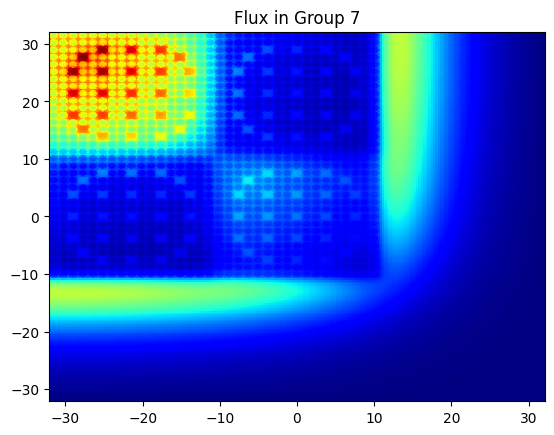

In [12]:
flux, x, y = moc.rasterize_flux(1000, 1000)

plt.title("Flux in Group 7")
plt.pcolormesh(x, y, flux[6, :, :], cmap='jet')
plt.show()

This example should give you all the basics you need to perform other 2D MOC simulations using Scarabée !